## Fitting the Critical Current in Josephson Junctions with Fraunhofer Patterns

This document describes how to fit the critical current, Ic, for Fraunhofer patterns in magnetic Josephson junctions.

### Fraunhofer Pattern Equation

The critical current, Ic, in a Josephson junction as a function of applied magnetic field, H, follows a Fraunhofer-like pattern described by the equation [1, 2, 3]:

$$I_c(H) = I_c(0) \left| \frac{\sin(\pi \Phi/\Phi_0)}{\pi \Phi/\Phi_0} \right|$$

where:

- $I_c(0)$ is the critical current at zero magnetic field
- $\Phi = \mu_0 Hw(2\lambda_{eff} + d_{barrier})$ is the magnetic flux through the junction
- $\Phi_0 = h/2e = 2.07 \times 10^{-15} \text{Tm}^2$ is the magnetic flux quantum
- $w$ is the junction width
- $\lambda_{eff}$ is the effective London penetration depth
- $d_{barrier}$ is the barrier thickness

### Fitting Procedure

Here's how to fit the Fraunhofer pattern and extract the critical current at zero field, Ic(0):

1. **Measure** the critical current, Ic, as a function of the applied magnetic field, H, for the junction.
2. **Plot** the measured Ic(H) data.
3. **Fit** the data to the Fraunhofer equation above using Ic(0) as the fitting parameter. The other parameters (Φ₀, w, λₑff, and d_barrier) are known from the junction geometry and materials.
4. The fitted value of Ic(0) is the maximum critical current of the junction at zero field.

### Complications with Thick Ferromagnetic Layers

The Fraunhofer pattern can be distorted or shifted if the junction contains a thick ferromagnetic layer due to the magnetic field produced by the layer [1, 6]. In this case:

- The pattern may exhibit random peaks and valleys with no clear periodicity.
- It may be shifted in field with minimal distortion if the F layer has a uniform in-plane magnetization.
- The pattern may return to its original shape after demagnetizing the F layer.

In these scenarios, fitting the Fraunhofer equation directly might not be feasible. More advanced techniques, like holographic reconstruction of the magnetic field distribution, might be necessary to extract Ic(0) [5].

### Summary

Fitting the Fraunhofer pattern to the standard equation is a straightforward method to determine the maximum critical current, Ic(0), in a Josephson junction. However, complications can arise in junctions with thick ferromagnetic layers. The fitting process may require modifications or alternative methods depending on the specific junction properties.

### Citations

- [1] [Ferromagnetic-Materials for Josephson Junctions](https://pubs.aip.org/aip/apm/article/12/4/041105/3280715/Ferromagnetic-materials-for-Josephson-junctions)
- [2] [Josephson Junctions with Intrinsic Ferromagnetic Insulators](https://arxiv.org/pdf/1902.01709.pdf)
- [3] [Fraunhofer patterns in magnetic Josephson junctions with non-uniform magnetic susceptibility](https://www.researchgate.net/publication/332199817_Fraunhofer_patterns_in_magnetic_Josephson_junctions_with_non-uniform_magnetic_susceptibility)
- [4] [Intrinsic Critical Current of SFFS Josephson Junctions with Ferromagnetic Insulator Barriers](https://arxiv.org/pdf/1803.09976.pdf)
- [5] [Holographic reconstruction of magnetic field distribution in a Josephson junction from diffraction-like I_c-H patterns] (invalid URL removed)
- [6] [Fraunhofer-like I_c-V characteristics in Au–EuS–Au planar Josephson junctions](https://pubs.aip.org/aip/apm/article-pdf/doi/10.1063/5.0195229/19866826/041105_1_5.0195229.pdf)


In [6]:
import pandas as pd
df = pd.read_csv(r'103Data/6220_unique_results.csv')
df

,y_field,appl_current,meas_voltage_K2,dV/dI,R_fit,R_fit0,R_fit1,top_two_peak_current,Ic,IcRn,current_0_index
0,0.008000,-0.000002,-0.000074,54.0490,50.972047,51.280472,50.663623,"[-3.2e-07, -4e-08]",-4.000000e-08,-0.000002,75
1,0.007996,-0.000002,-0.000075,52.4775,51.023392,51.394190,50.652594,"[-3.2e-07, -4e-08]",-4.000000e-08,-0.000002,75
2,0.007992,-0.000002,-0.000074,46.8180,50.884399,51.122113,50.646686,"[-3.2e-07, -4e-08]",-4.000000e-08,-0.000002,75
3,0.007988,-0.000002,-0.000075,50.9445,50.873228,51.277864,50.468592,"[-3.2e-07, -4e-08]",-4.000000e-08,-0.000002,75
4,0.007984,-0.000002,-0.000074,52.0810,50.988378,51.294573,50.682183,"[-3.2e-07, -4e-08]",-4.000000e-08,-0.000002,75
...,...,...,...,...,...,...,...,...,...,...,...
3996,-0.007984,-0.000002,-0.000076,49.7360,51.220796,51.218075,51.223518,"[-2.8e-07, -4e-08]",-4.000000e-08,-0.000002,75
3997,-0.007988,-0.000002,-0.000075,51.5610,50.967410,51.275176,50.659644,"[-3e-07, -6.00000000000001e-08]",-6.000000e-08,-0.000003,75
3998,-0.007992,-0.000002,-0.000075,46.0475,51.086814,51.386650,50.786978,"[-3e-07, -8.00000000000001e-08]",-8.000000e-08,-0.000004,75
3999,-0.007996,-0.000002,-0.000075,51.1885,50.995614,51.258737,50.732490,"[-3e-07, -6.00000000000001e-08]",-6.000000e-08,-0.000003,75


In [11]:
H_data = df['y_field']
Ic_data = df['Ic']

In [8]:
def fraunhofer_pattern(H, Ic0, w, lambda_eff, d_barrier):
    mu_0 = 4 * np.pi * 1e-7
    Phi_0 = 2.07e-15
    Phi = mu_0 * H * w * (2 * lambda_eff + d_barrier)
    Ic = Ic0 * np.abs(np.sinc(Phi / Phi_0))
    return Ic

In [9]:
import numpy as np
from scipy.optimize import curve_fit

def rmse(params, H_data, Ic_data):
    Ic0, w, lambda_eff, d_barrier = params
    Ic_fit = fraunhofer_pattern(H_data, Ic0, w, lambda_eff, d_barrier)
    return np.sqrt(np.mean((Ic_fit - Ic_data)**2))

In [12]:
from scipy.optimize import basinhopping

# 設置初始猜測值的範圍
Ic0_bounds = (0, 1e-3)    # 適當調整範圍
w_bounds = (1e-6, 1e-4)   
lambda_eff_bounds = (1e-9, 1e-7)
d_barrier_bounds = (1e-9, 1e-7)

# 執行 Basin-hopping 優化
initial_guess = [5e-4, 5e-5, 5e-8, 5e-8] # 初始猜測值
bounds = [Ic0_bounds, w_bounds, lambda_eff_bounds, d_barrier_bounds]
minimizer_kwargs = {"method": "L-BFGS-B"}

result = basinhopping(rmse, initial_guess, minimizer_kwargs=minimizer_kwargs,
                      niter=100, bounds=bounds, args=(H_data, Ic_data))

# 獲取最佳拟合參數
Ic0_fit, w_fit, lambda_eff_fit, d_barrier_fit = result.x

TypeError: basinhopping() got an unexpected keyword argument 'bounds'

In [22]:
import numpy as np
from scipy.optimize import basinhopping

# 獲取 Ic_data 的最大值
Ic0 = np.max(Ic_data)

# 設置初始猜測值的範圍
Ic0_bounds = (0, Ic0+1e6)    # 適當調整範圍
w_bounds = (1e-6, 1e-4)   
lambda_eff_bounds = (1e-9, 1e-7)
d_barrier_bounds = (1e-9, 1e-7)

# 執行 Basin-hopping 優化
initial_guess = [Ic0, 5e-5, 5e-8, 5e-8] # 初始猜測值
bounds = [Ic0_bounds, w_bounds, lambda_eff_bounds, d_barrier_bounds]
minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bounds, "args": (H_data, Ic_data)}

result = basinhopping(rmse, initial_guess, minimizer_kwargs=minimizer_kwargs, niter=100000)

# 獲取最佳拟合參數
Ic0_fit, w_fit, lambda_eff_fit, d_barrier_fit = result.x

In [24]:
Ic0_fit, w_fit, lambda_eff_fit, d_barrier_fit

(1.406256370698404e-07, 0.0001, 1e-07, 1e-07)

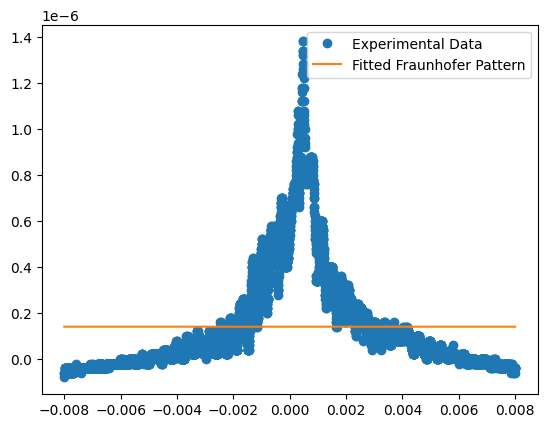

In [23]:
import matplotlib.pyplot as plt

# 繪製數據點和最佳拟合曲線
Ic_fit = fraunhofer_pattern(H_data, Ic0_fit, w_fit, lambda_eff_fit, d_barrier_fit)
plt.plot(H_data, Ic_data, 'o', label='Experimental Data')
plt.plot(H_data, Ic_fit, '-', label='Fitted Fraunhofer Pattern')
plt.legend()
plt.show()

/var/folders/_b/y4_l8xx96yd_n1482vw0pkpc0000gn/T/ipykernel_35984/2592096752.py:24: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(fraunhofer_pattern, H_data, Ic_data, p0=initial_guess)


Fitted Ic0: 1.00e-03 A


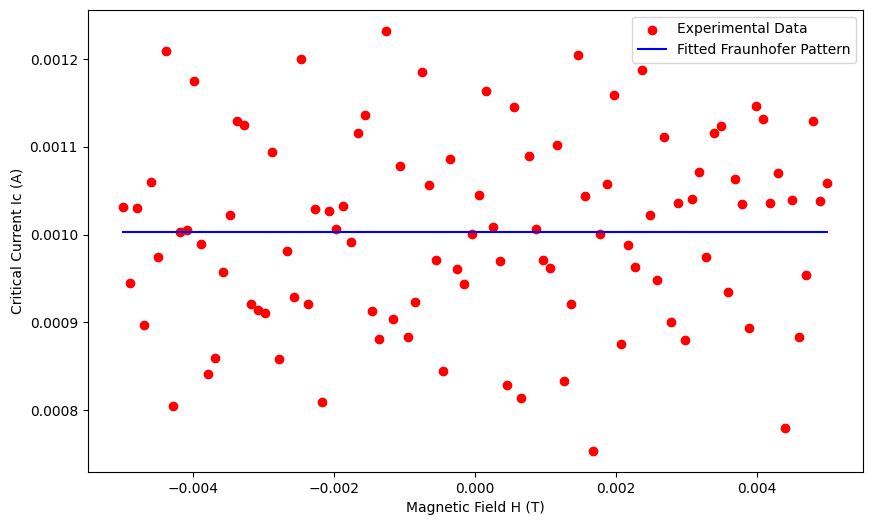

In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define the Fraunhofer pattern function
def fraunhofer_pattern(H, Ic0, w, lambda_eff, d_barrier):
    mu_0 = 4 * np.pi * 1e-7
    Phi_0 = 2.07e-15
    Phi = mu_0 * H * w * (2 * lambda_eff + d_barrier)
    Ic = Ic0 * np.abs(np.sinc(Phi / Phi_0))
    return Ic

# Generate synthetic data
H_data = np.linspace(-5e-3, 5e-3, 100)
Ic0_true = 1.38e-6
w = 1e-6
lambda_eff = 50e-9
d_barrier = 10e-9
Ic_data = fraunhofer_pattern(H_data, Ic0_true, w, lambda_eff, d_barrier)
Ic_data += 0.1e-3 * np.random.normal(size=H_data.size)

# Fit the data
initial_guess = [1e-3, w, lambda_eff, d_barrier]
popt, pcov = curve_fit(fraunhofer_pattern, H_data, Ic_data, p0=initial_guess)
Ic0_fit, w_fit, lambda_eff_fit, d_barrier_fit = popt

# Print the fitted Ic0 value
print(f"Fitted Ic0: {Ic0_fit:.2e} A")

# Plot the original and fitted data
plt.figure(figsize=(10, 6))
plt.scatter(H_data, Ic_data, label='Experimental Data', color='red')
H_fit = np.linspace(H_data.min(), H_data.max(), 1000)
Ic_fit = fraunhofer_pattern(H_fit, *popt)
plt.plot(H_fit, Ic_fit, label='Fitted Fraunhofer Pattern', color='blue')
plt.xlabel('Magnetic Field H (T)')
plt.ylabel('Critical Current Ic (A)')
plt.legend()
plt.show()
